In [1]:
import pandas as pd

# Load the cleaned data
file_path = r"C:\Users\user\Desktop\NVIDIA Stock predictive analysis\cleaned_nvda_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,7_day_MA,30_day_MA,Daily_Return,Volatility
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,NaN,NaN,NaN,NaN
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,NaN,NaN,0.104764,NaN
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,NaN,NaN,-0.077594,NaN
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,NaN,NaN,-0.003110,NaN
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,NaN,NaN,-0.003144,NaN


In [3]:
# Compute Relative Strength Index (RSI)
window_length = 14  # Standard RSI window

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()

rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,7_day_MA,30_day_MA,Daily_Return,Volatility,RSI
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,NaN,NaN,NaN,NaN,NaN
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,NaN,NaN,0.104764,NaN,NaN
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,NaN,NaN,-0.077594,NaN,NaN
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,NaN,NaN,-0.003110,NaN,NaN
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,NaN,NaN,-0.003144,NaN,NaN


In [5]:
df = df.dropna().reset_index(drop=True)


In [6]:
print(df.head(10))  # View the first 10 rows
print(df.isnull().sum())  # Confirm no NaN values remain


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1999-03-08  0.042708  0.045833  0.041927  0.044531   0.040845   75888000   
1  1999-03-09  0.044401  0.046615  0.044401  0.045964   0.042159  143184000   
2  1999-03-10  0.046615  0.046615  0.044531  0.045182   0.041442  235344000   
3  1999-03-11  0.044401  0.045182  0.043229  0.043229   0.039651   54288000   
4  1999-03-12  0.043490  0.043490  0.041667  0.042448   0.038934   90768000   
5  1999-03-15  0.043490  0.044792  0.043229  0.044271   0.040607  108816000   
6  1999-03-16  0.044531  0.045052  0.042448  0.042839   0.039293   79152000   
7  1999-03-17  0.043229  0.044010  0.042057  0.043099   0.039532   51360000   
8  1999-03-18  0.043229  0.044271  0.042188  0.043620   0.040009   46320000   
9  1999-03-19  0.043490  0.045052  0.043490  0.043750   0.040129  105312000   

   7_day_MA  30_day_MA  Daily_Return  Volatility        RSI  
0  0.044234   0.042496      0.014836    0.048309  51.784980  
1  0.0

In [7]:
# Exponential Moving Averages (Short-term and Long-term)
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()

# Relative Strength Index (RSI)
delta = df['Close'].diff(1)  
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands (20-day window)
df['Middle_Band'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(window=20).std() * 2)


In [8]:
print(df.head(10))  # View the new features
print(df.isnull().sum())  # Ensure no NaN values remain


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1999-03-08  0.042708  0.045833  0.041927  0.044531   0.040845   75888000   
1  1999-03-09  0.044401  0.046615  0.044401  0.045964   0.042159  143184000   
2  1999-03-10  0.046615  0.046615  0.044531  0.045182   0.041442  235344000   
3  1999-03-11  0.044401  0.045182  0.043229  0.043229   0.039651   54288000   
4  1999-03-12  0.043490  0.043490  0.041667  0.042448   0.038934   90768000   
5  1999-03-15  0.043490  0.044792  0.043229  0.044271   0.040607  108816000   
6  1999-03-16  0.044531  0.045052  0.042448  0.042839   0.039293   79152000   
7  1999-03-17  0.043229  0.044010  0.042057  0.043099   0.039532   51360000   
8  1999-03-18  0.043229  0.044271  0.042188  0.043620   0.040009   46320000   
9  1999-03-19  0.043490  0.045052  0.043490  0.043750   0.040129  105312000   

   7_day_MA  30_day_MA  Daily_Return  Volatility  RSI     EMA_7    EMA_30  \
0  0.044234   0.042496      0.014836    0.048309  NaN

In [9]:
# Drop rows with NaN values (first few days of calculations)
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check again
print(df.head(10))
print(df.isnull().sum())  # Should return all zeros


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1999-04-05  0.042188  0.043229  0.041146  0.041406   0.037979   98640000   
1  1999-04-06  0.041797  0.041927  0.039583  0.040365   0.037024   69696000   
2  1999-04-07  0.040625  0.044010  0.040365  0.043750   0.040129   89280000   
3  1999-04-08  0.044010  0.045833  0.043490  0.044531   0.040845  130128000   
4  1999-04-09  0.044792  0.044792  0.043490  0.043750   0.040129   48624000   
5  1999-04-12  0.043229  0.043229  0.041146  0.041927   0.038457   33312000   
6  1999-04-13  0.042708  0.042708  0.039583  0.040234   0.036904   36144000   
7  1999-04-14  0.040104  0.041016  0.039063  0.039063   0.035830   48288000   
8  1999-04-15  0.040104  0.040104  0.039063  0.040104   0.036784   35856000   
9  1999-04-16  0.039844  0.042057  0.039844  0.041406   0.037979   38928000   

   7_day_MA  30_day_MA  Daily_Return  Volatility        RSI     EMA_7  \
0  0.042559   0.043694     -0.030486    0.043223  43.2086

In [10]:
# Summary statistics
print(df.describe())


              Open         High          Low        Close    Adj Close  \
count  6344.000000  6344.000000  6344.000000  6344.000000  6344.000000   
mean      5.735140     5.839804     5.626121     5.740388     5.713728   
std      14.196672    14.452782    13.923531    14.217983    14.220347   
min       0.034896     0.035547     0.033333     0.034115     0.031291   
25%       0.280156     0.287500     0.272917     0.280177     0.256986   
50%       0.458500     0.466125     0.451875     0.459000     0.429071   
75%       4.162313     4.212750     4.096438     4.145875     4.101282   
max     132.990005   136.330002   130.690002   135.580002   135.580002   

             Volume     7_day_MA    30_day_MA  Daily_Return   Volatility  \
count  6.344000e+03  6344.000000  6344.000000   6344.000000  6344.000000   
mean   6.105325e+08     5.678347     5.472263      0.001981     0.033344   
std    4.316472e+08    13.944407    13.114963      0.037801     0.017858   
min    1.968000e+07     0.035

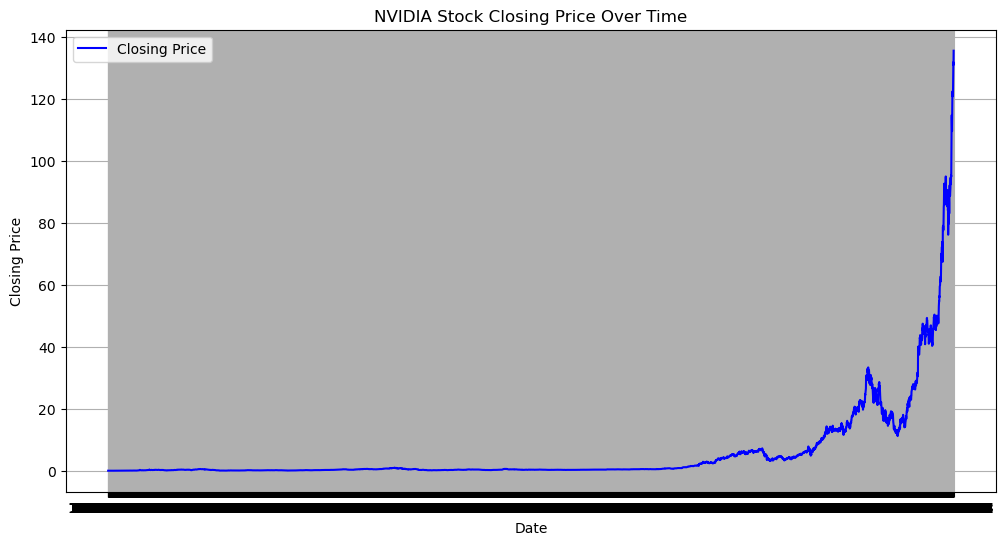

In [11]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot Closing Price
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.legend()
plt.grid()

# Show plot
plt.show()


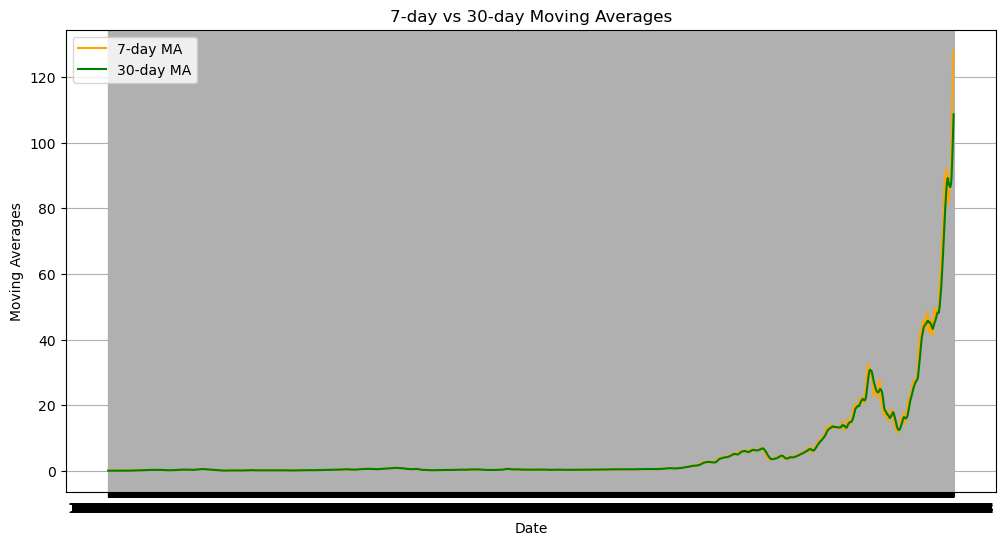

In [12]:
plt.figure(figsize=(12, 6))

# Plot Moving Averages
plt.plot(df['Date'], df['7_day_MA'], label='7-day MA', color='orange')
plt.plot(df['Date'], df['30_day_MA'], label='30-day MA', color='green')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Moving Averages')
plt.title('7-day vs 30-day Moving Averages')
plt.legend()
plt.grid()

plt.show()


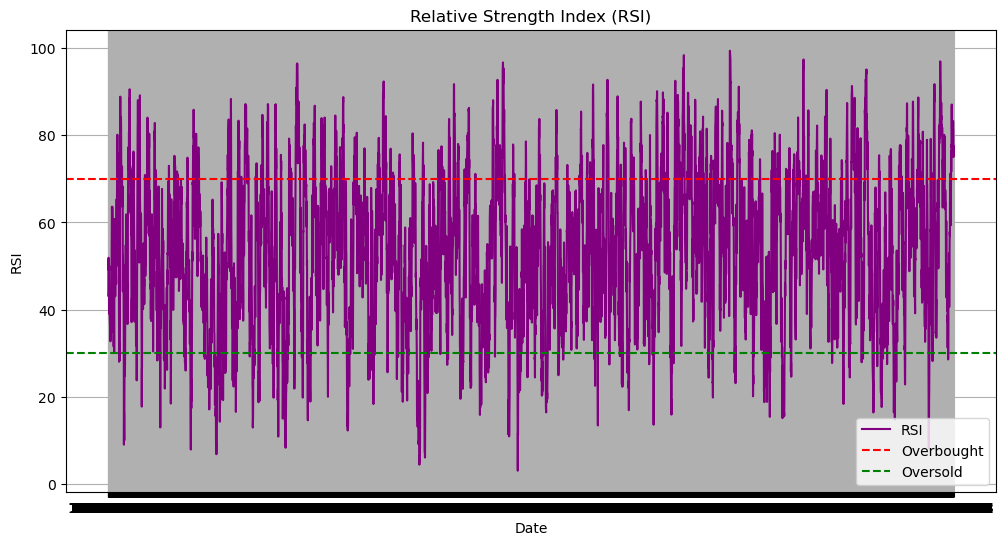

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')

# Add horizontal lines for Overbought & Oversold levels
plt.axhline(y=70, color='r', linestyle='--', label="Overbought")
plt.axhline(y=30, color='g', linestyle='--', label="Oversold")

plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid()

plt.show()


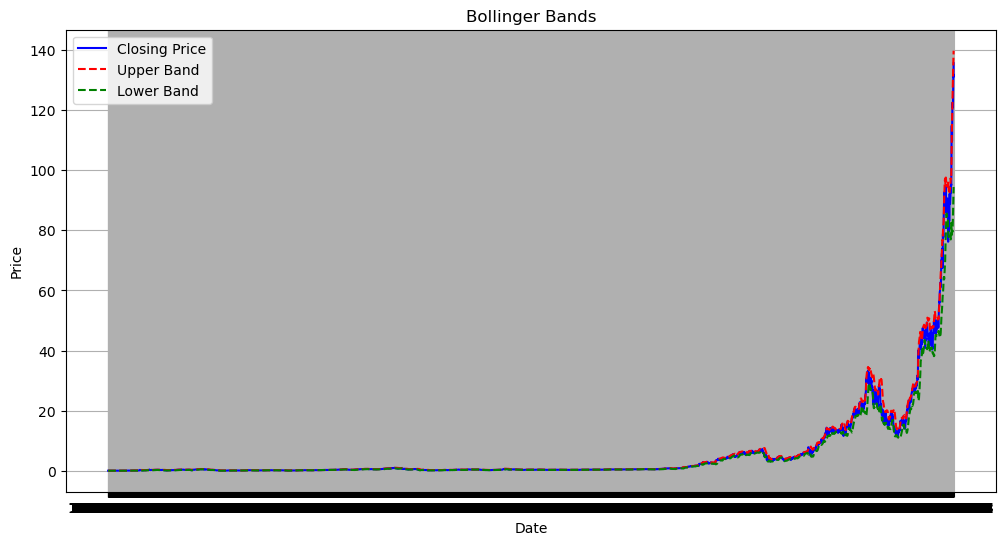

In [14]:
plt.figure(figsize=(12, 6))

# Plot Closing Price & Bollinger Bands
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', linestyle='dashed', color='red')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', linestyle='dashed', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.grid()

plt.show()


In [15]:
df.to_csv(r"C:\Users\user\Desktop\NVIDIA Stock predictive analysis\feature_engineered_nvda_data.csv", index=False)
